In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
nepal = pd.read_csv("eq2015.csv")
fuente_1 = "https://www.kaggle.com/datasets/sanskarnegi/nepal-earthquake-2015"

In [8]:
nepal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Unnamed: 0                   762106 non-null  int64 
 1   building_id                  762106 non-null  int64 
 2   district_id                  762106 non-null  int64 
 3   vdcmun_id                    762106 non-null  int64 
 4   ward_id                      762106 non-null  int64 
 5   count_floors_pre_eq          762106 non-null  int64 
 6   count_floors_post_eq         762106 non-null  int64 
 7   age_building                 762106 non-null  int64 
 8   plinth_area_sq_ft            762106 non-null  int64 
 9   height_ft_pre_eq             762106 non-null  int64 
 10  height_ft_post_eq            762106 non-null  int64 
 11  land_surface_condition       762106 non-null  object
 12  foundation_type              762106 non-null  object
 13  roof_type     

In [ ]:
hipotesis_1 = "Los edificios de mayor altura son más propensos a derrumbarse durante grandes terremotos"

In [ ]:
nepal.groupby("damage_grade")["age_building"].value_counts()

[damage_grade  age_building
 Grade 1       1               7175
               5               5905
               3               5766
               2               5690
               10              5234
                               ... 
 Grade 5       174                1
               175                1
               178                1
               185                1
               195                1
 Name: count, Length: 690, dtype: int64]

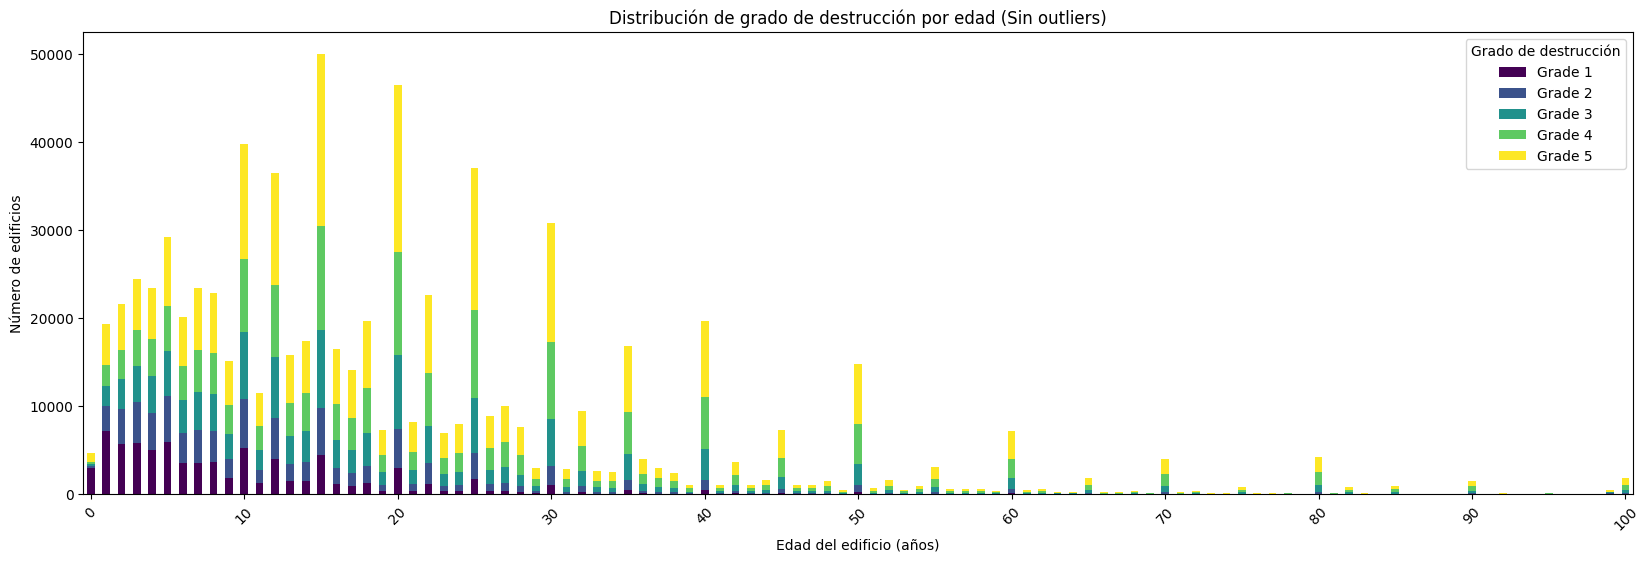

In [39]:
df_filtered = nepal[nepal['age_building'] <= 100]  # Filtra edificios con menos de 200 años
df_grouped_filtered = df_filtered.groupby(['age_building', 'damage_grade']).size().unstack()

ax = df_grouped_filtered.plot(kind='bar', stacked=True, figsize=(20, 6), colormap='viridis')

ticks = np.arange(0, df_filtered['age_building'].max() + 10, 10)  # Genera ticks cada 10 años
ax.set_xticks(ticks)  # Aplica los ticks al eje X
ax.set_xticklabels(ticks, rotation=45)  # Rota las etiquetas para mejor visibilidad

plt.xlabel('Edad del edificio (años)')
plt.ylabel('Número de edificios')
plt.title('Distribución de grado de destrucción por edad (Sin outliers)')
plt.legend(title='Grado de destrucción')
plt.show()